## Code alongs - Data storytelling


In [35]:
import pandas as pd

df_annual = pd.read_csv("../data/co2_annmean_mlo.csv", skiprows=43)
df_annual.head()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In [36]:
df_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    64 non-null     int64  
 1   mean    64 non-null     float64
 2   unc     64 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB


<Axes: xlabel='year'>

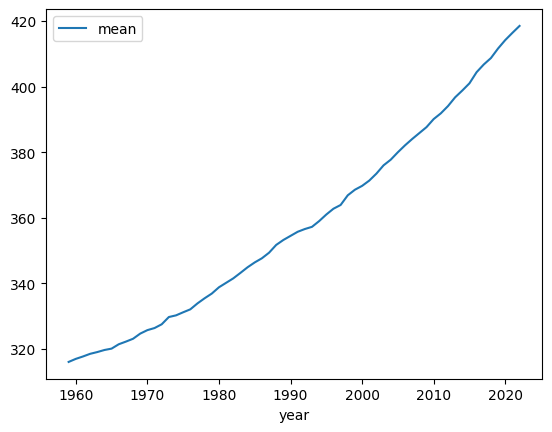

In [37]:
df_annual.plot(x = "year", y="mean")

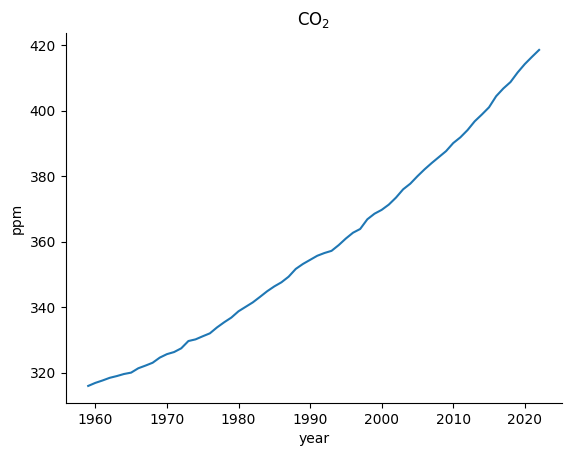

In [40]:
ax_annual = df_annual.plot(x="year", y="mean", ylabel="ppm", title="CO$_2$") 
# no need for top and bottom spines
ax_annual.spines["top"].set_visible(False)
ax_annual.spines["right"].set_visible(False)

# remove legend
ax_annual.legend().set_visible(False)

In [15]:
df_country = pd.read_html("https://www.worldometers.info/co2-emissions/co2-emissions-by-country/", index_col=0)[0]
df_country.head()

,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,Share of world
#,,,,,,
1,China,10432751400,-0.28%,1401889681,7.44,29.18%
2,United States,5011686600,-2.01%,327210198,15.32,14.02%
3,India,2533638100,4.71%,1338636340,1.89,7.09%
4,Russia,1661899300,-2.13%,145109157,11.45,4.65%
5,Japan,1239592060,-1.21%,126993857,9.76,3.47%


In [30]:
df_country = df_country.rename({"Share  of world": "World percentage"}, axis=1)

df_country.head()

,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,World percentage
#,,,,,,
1,China,10432751400,-0.28%,1401889681,7.44,29.18%
2,United States,5011686600,-2.01%,327210198,15.32,14.02%
3,India,2533638100,4.71%,1338636340,1.89,7.09%
4,Russia,1661899300,-2.13%,145109157,11.45,4.65%
5,Japan,1239592060,-1.21%,126993857,9.76,3.47%


In [31]:
df_country["World percentage"] = (
    df_country["World percentage"].str.rstrip("%").astype(float)
)

df_country.head()


,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,World percentage
#,,,,,,
1,China,10432751400,-0.28%,1401889681,7.44,29.18
2,United States,5011686600,-2.01%,327210198,15.32,14.02
3,India,2533638100,4.71%,1338636340,1.89,7.09
4,Russia,1661899300,-2.13%,145109157,11.45,4.65
5,Japan,1239592060,-1.21%,126993857,9.76,3.47


<Axes: xlabel='Country'>

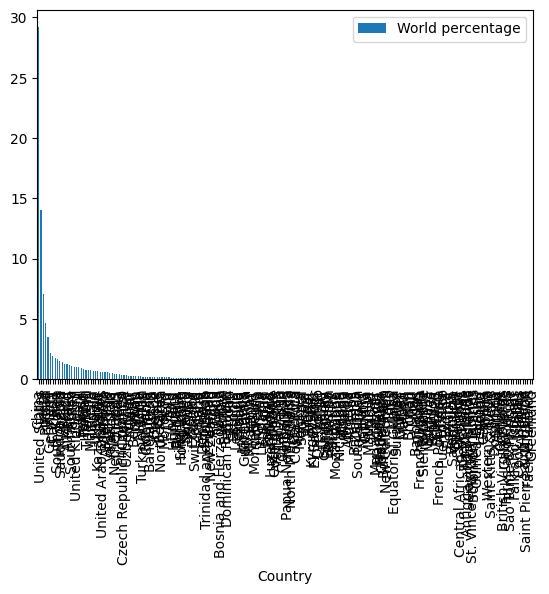

In [32]:
df_country.plot(kind="bar", x = "Country", y="World percentage")

<Axes: xlabel='Country'>

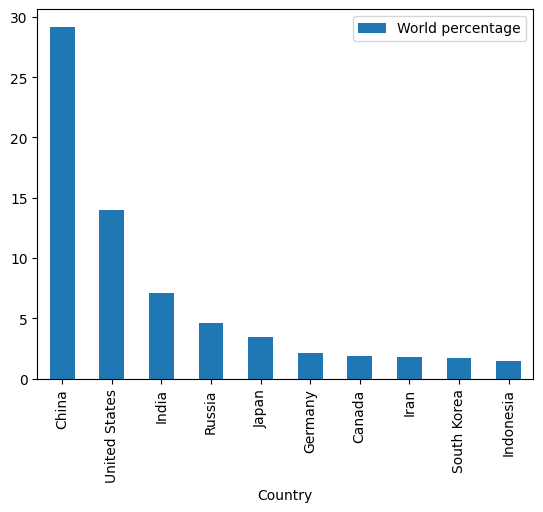

In [33]:
df_country.head(10).plot(kind="bar", x="Country", y="World percentage")

## Attention
- highlight important aspects of your visuls
- guide audience attention to what you want
- use colors sparingly
- play with thickness

## contrast
- axis info > low contrast
- important info > high contrast

## Descriptive title and labels
- describe your meassage clearly

<Axes: title={'left': 'The annual mean of CO$_2$ emissions measured in\n Mauana Loa has increased every year since 1959 '}, xlabel='YEARS FROM 1959', ylabel='CO$_2$ MOLE FRACTION IN PPM'>

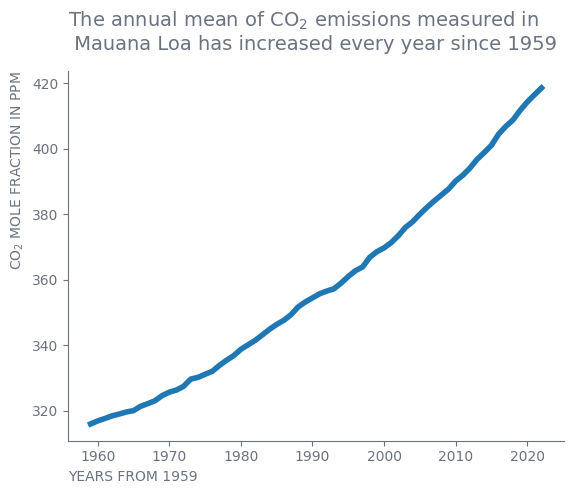

In [51]:
ax_annual = df_annual.plot(x="year", y="mean", linewidth = 4)

GRAY1 = "#6b7280"

ax_annual.spines["top"].set_visible(False)
ax_annual.spines["right"].set_visible(False)
ax_annual.legend().set_visible(False)

ax_annual.spines["left"].set_color(GRAY1)
ax_annual.spines["bottom"].set_color(GRAY1)
ax_annual.tick_params(colors=GRAY1)

ax_annual.set_xlabel("YEARS FROM 1959", loc="left", color=GRAY1)
ax_annual.set_ylabel("CO$_2$ MOLE FRACTION IN PPM", loc="top", color=GRAY1)
ax_annual.set_title( 
    "The annual mean of CO$_2$ emissions measured in\n Mauana Loa has increased every year since 1959 ",
    loc= "left", pad=15,color=GRAY1, fontsize=14 )
ax_annual


Text(0.5, 1.0, 'Top Three CO$_2$ eiomitters stand for more\n 50 % of the worlds total CO$_2$')

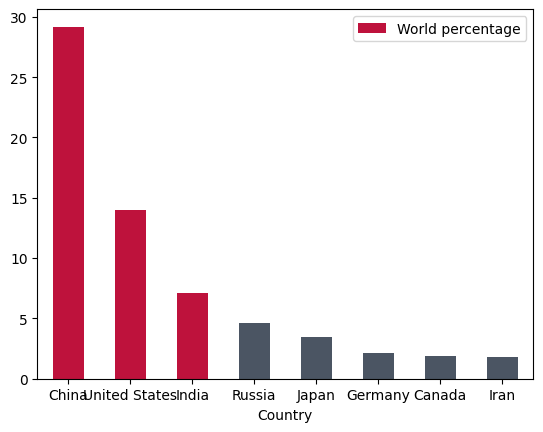

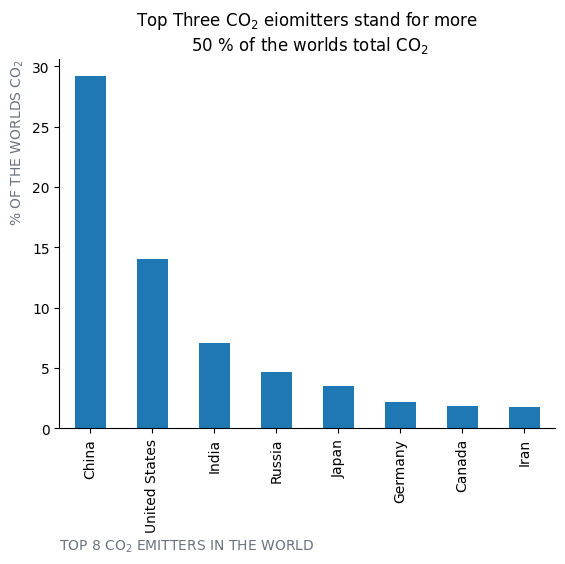

In [56]:
numbers_countries = 8
top_emitter = 3
red, gray = "#be123c", "#4b5563"
colors =[red]*top_emitter + [gray]*(numbers_countries-top_emitter)

ax_country = df_country.head(numbers_countries).plot(
    kind="bar",
    y="World percentage",
    x="Country",
    color = colors,
    rot=0
)
ax_country=df_country.head(numbers_countries).plot(kind="bar", y="World percentage", x="Country")
ax_country.set_xlabel("TOP 8 CO$_2$ EMITTERS IN THE WORLD", loc="left", color = GRAY1)
ax_country.set_ylabel("% OF THE WORLDS CO$_2$", loc="top", color = GRAY1)

ax_country.spines["top"].set_visible(False)
ax_country.spines["right"].set_visible(False)
ax_country.legend().set_visible(False)

ax_country.set_title("Top Three CO$_2$ eomitters stand for more\n 50 % of the worlds total CO$_2$")